In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("C:/Users/manov/Downloads/bank+marketing/bank/bank.csv",delimiter=';', quotechar='"')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Handling Categorical Variables

In [7]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

df_encoded['default'] = df_encoded['default'].map({'yes': 1, 'no': 0})
df_encoded['housing'] = df_encoded['housing'].map({'yes': 1, 'no': 0})
df_encoded['loan'] = df_encoded['loan'].map({'yes': 1, 'no': 0})
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0}) 
df_encoded.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,...,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,...,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,...,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


# Feature Selection

In [8]:
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluate the Model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 86.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1205
           1       0.40      0.42      0.41       152

    accuracy                           0.86      1357
   macro avg       0.66      0.67      0.67      1357
weighted avg       0.87      0.86      0.87      1357



# Visualize the Decision Tree

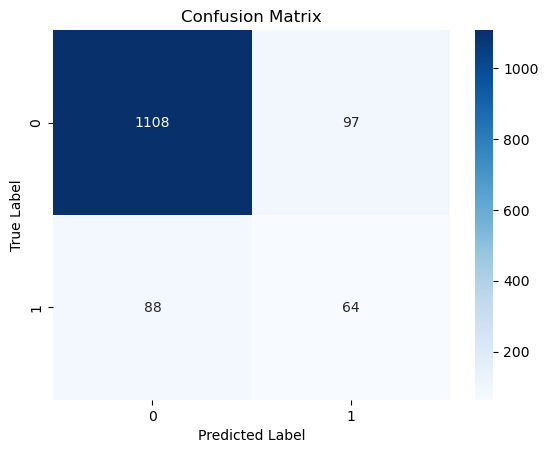

In [13]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

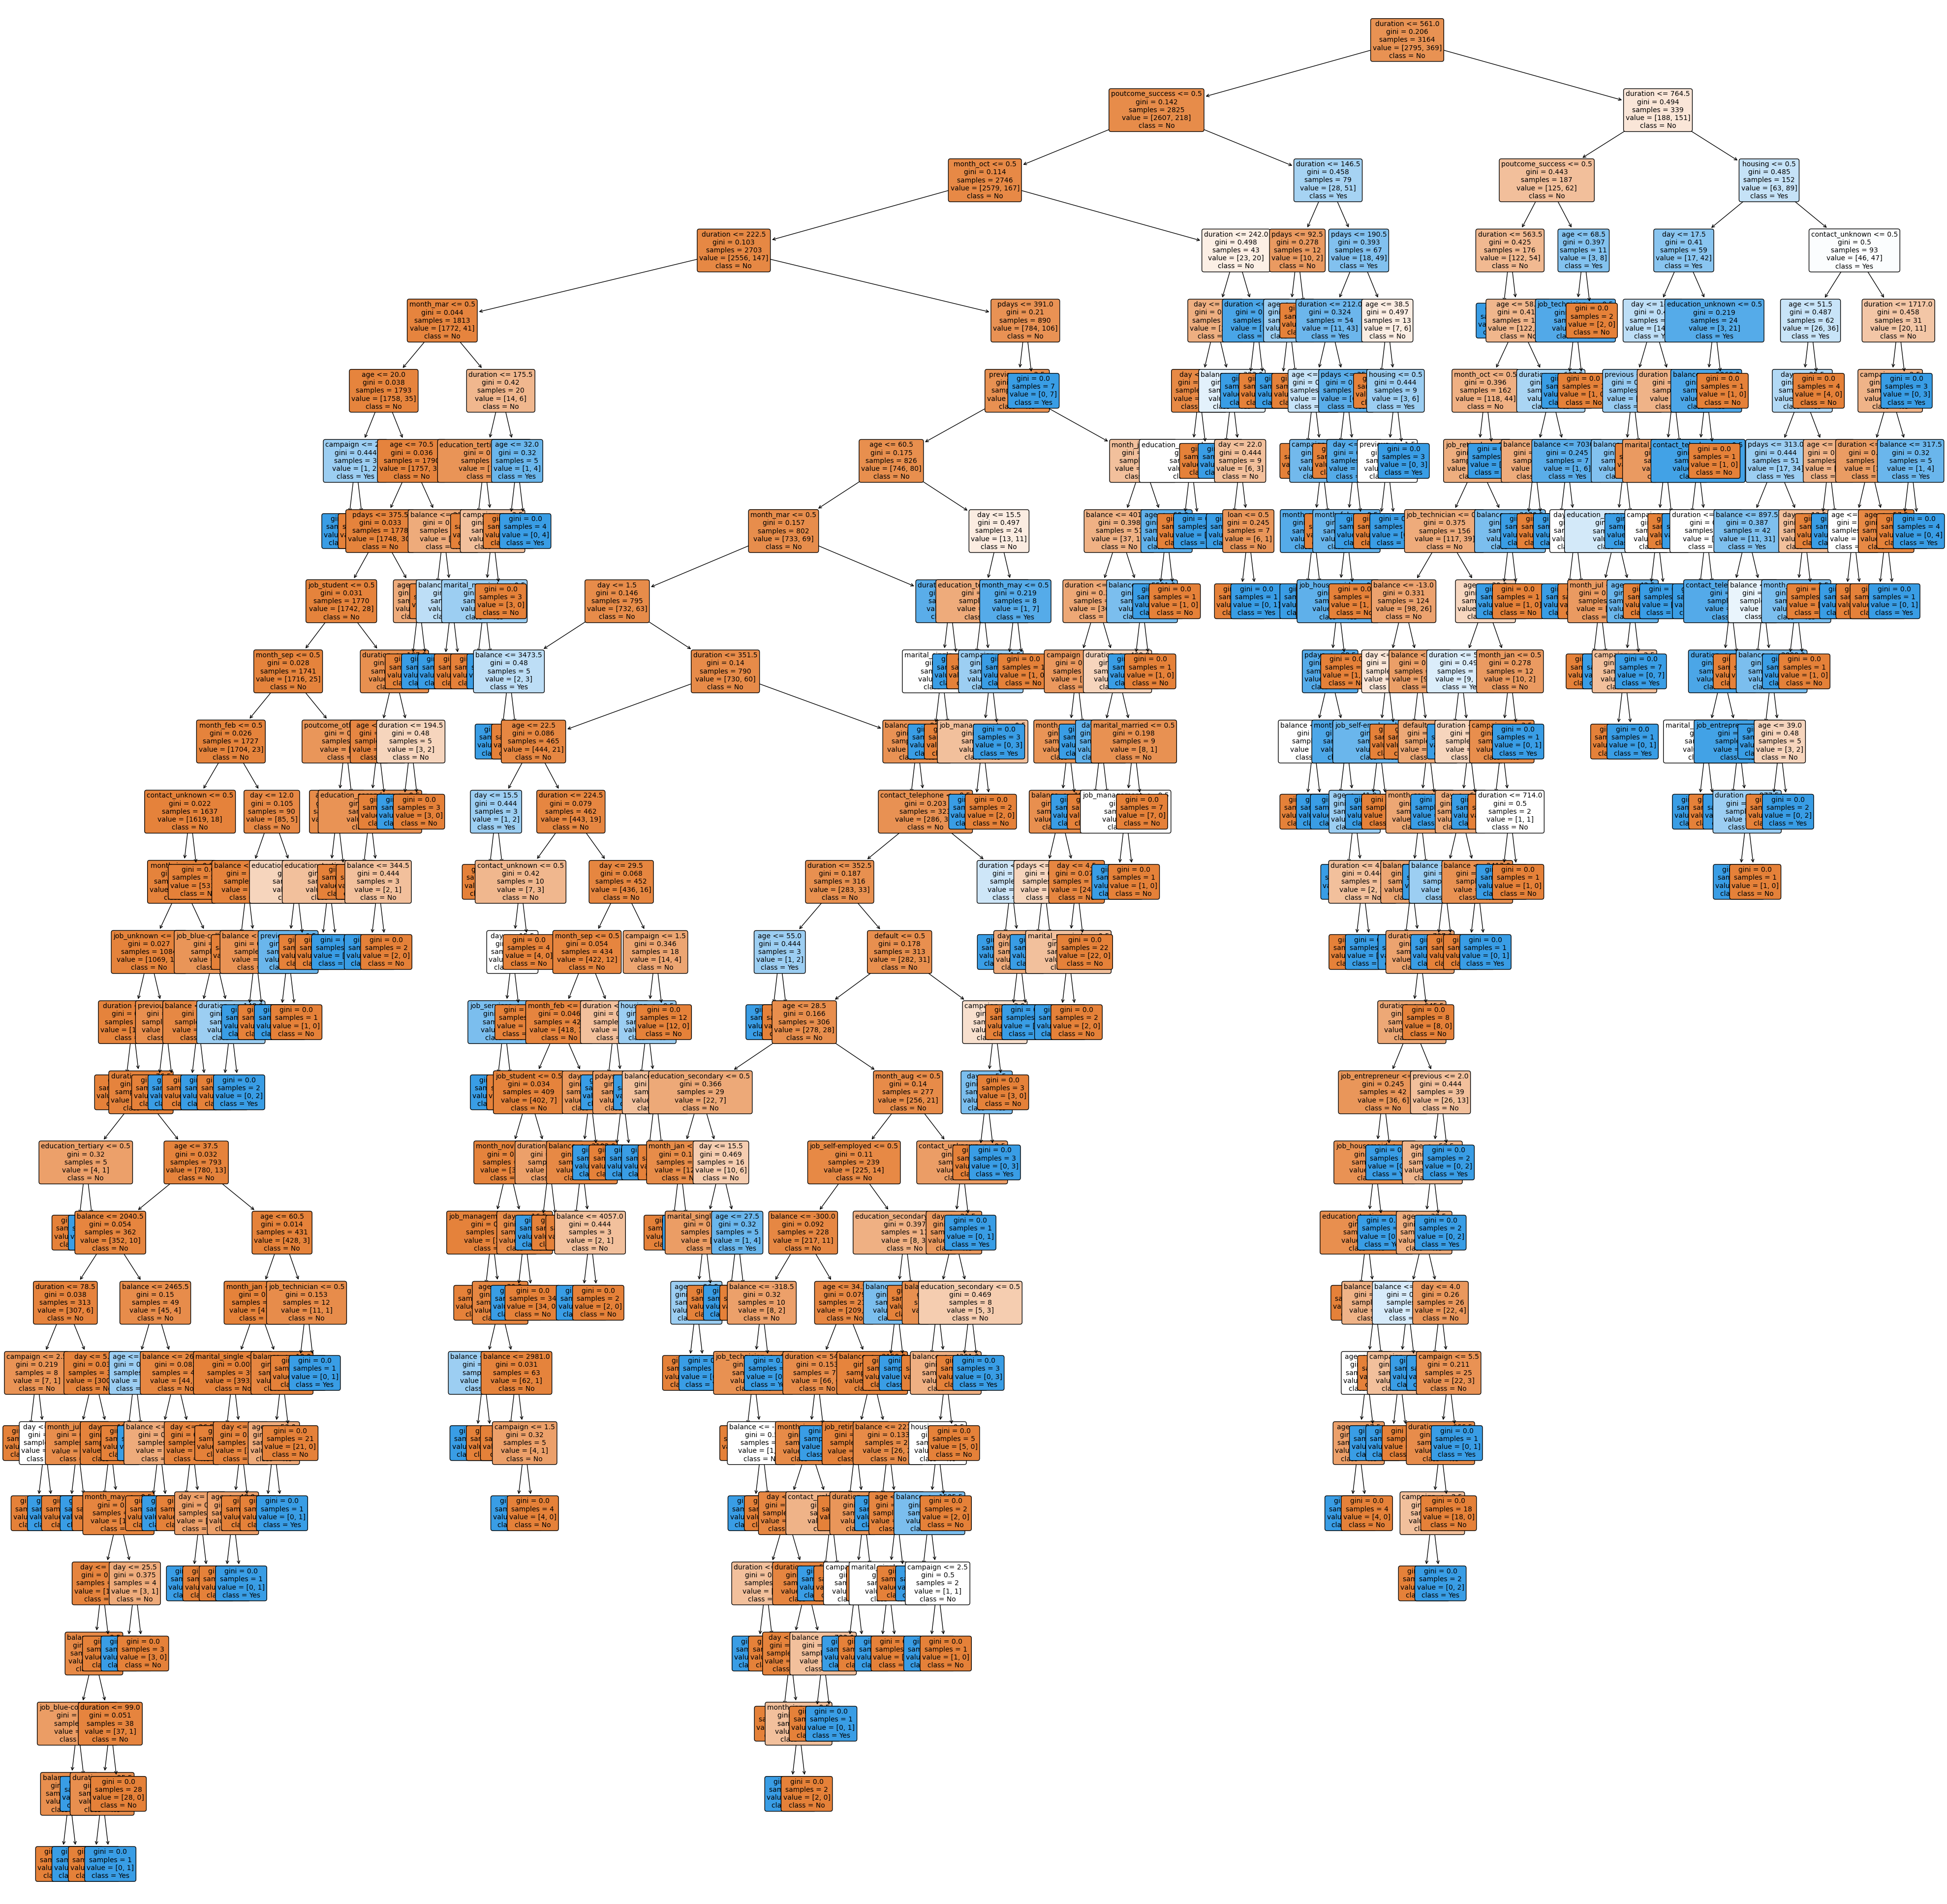

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert X.columns to a list
feature_names = list(X.columns)

# Plot the decision tree
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.show()